In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier

Read and Train Data

In [81]:
ziptrain = pd.read_csv('zip.train.csv', header=None)
ziptest = pd.read_csv('zip.test.csv', header=None)
col_names = ["Y"]
col_names.extend(["X%d" % i for i in range(ziptrain.shape[1]-1)])
ziptrain.columns = col_names
ziptest.columns = col_names
ziptrain27 = ziptrain[ziptrain["Y"].isin([2, 7])]
ziptest27 = ziptest[ziptest["Y"].isin([2, 7])]
ziptrain27.head()

,Y,X0,X1,X2,X3,X4,X5,X6,X7,X8,...,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255
3,7,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,...,-0.318,1.000,0.536,-0.987,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
10,7,-1.0,-1.0,-1.0,-1.000,-1.000,-0.596,0.912,1.000,0.290,...,-1.000,-0.795,0.663,-0.074,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
14,7,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-0.632,...,-1.000,-0.967,0.866,-0.001,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
15,7,-1.0,-1.0,-1.0,-0.929,0.351,0.798,0.806,0.114,0.015,...,0.835,-0.086,-0.991,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
22,7,-1.0,-1.0,-1.0,-1.000,-0.869,0.777,-0.007,-0.697,-1.000,...,-0.933,0.667,-0.315,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


1) Exploratory Data Analysis of Training Data

In [82]:
summary = ziptrain27.describe()
summary

,Y,X0,X1,X2,X3,X4,X5,X6,X7,X8,...,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255
count,1376.00000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,...,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000
mean,4.34375,-0.984251,-0.922622,-0.837593,-0.707725,-0.516504,-0.337713,-0.215398,-0.177012,-0.236985,...,-0.459176,-0.328480,-0.533847,-0.822799,-0.905086,-0.889243,-0.849907,-0.852942,-0.907160,-0.972828
std,2.49602,0.105798,0.307493,0.439262,0.549117,0.656989,0.719407,0.749200,0.768320,0.752911,...,0.691796,0.754303,0.667315,0.431136,0.349080,0.367509,0.432005,0.429968,0.335022,0.148830
min,2.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,2.00000,-1.000000,-1.000000,-1.000000,-1.000000,-0.979000,-0.638000,-0.344000,-0.281500,-0.432000,...,-0.941500,-0.761500,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
75%,7.00000,-1.000000,-1.000000,-1.000000,-0.684000,-0.047250,0.280500,0.494500,0.555000,0.493250,...,0.119750,0.435750,-0.097750,-0.992000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
max,7.00000,0.412000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.592000


In [83]:
ziptrain.shape

(7291, 257)

In [84]:
ziptrain[ziptrain["Y"] == 2].shape

(731, 257)

In [85]:
ziptrain[ziptrain["Y"] == 7].shape

(645, 257)

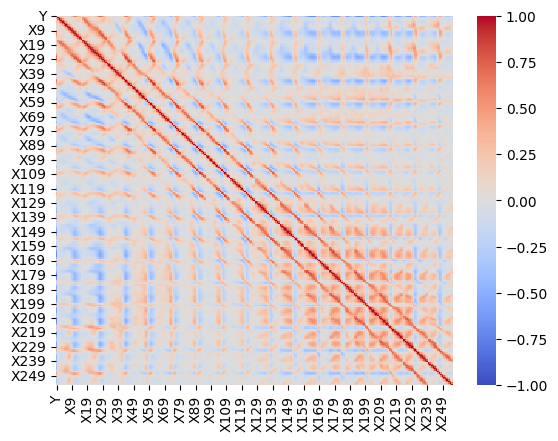

In [86]:
sns.heatmap(ziptrain27.corr(), vmin = -1, vmax = 1, cmap="coolwarm")
plt.show()

7


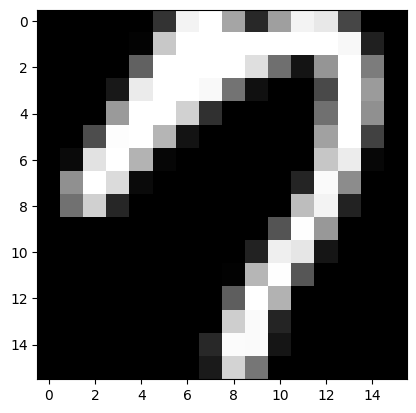

In [87]:
image_row = 1
image_arr = ziptrain27.iloc[image_row, 1:]
image_arr = image_arr.values.reshape((16, 16))
plt.gray()
plt.imshow(image_arr)
print(ziptrain27["Y"].iloc[image_row])

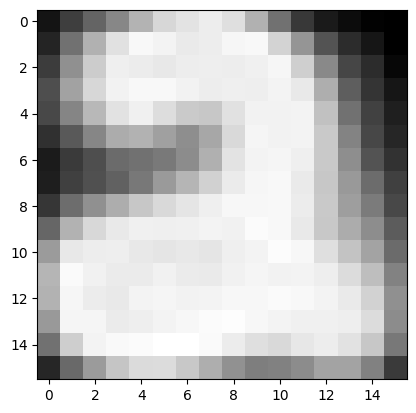

In [88]:
image_row = 2
twoSum = ziptrain27[ziptrain27["Y"]== 2].describe()
image_arr3 = twoSum.iloc[image_row, 1:]
image_arr3 = image_arr3.values.reshape((16, 16))
plt.gray()
plt.imshow(image_arr3)

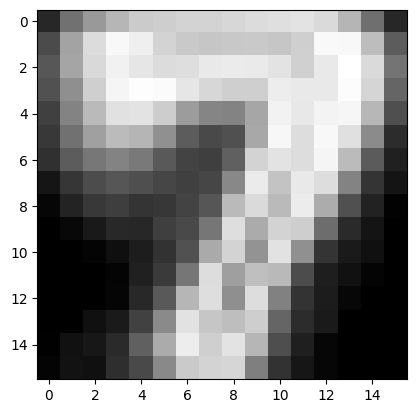

In [89]:
image_row = 2
sevSum = ziptrain27[ziptrain27["Y"]== 7].describe()
image_arr4 = sevSum.iloc[image_row, 1:]
image_arr4 = image_arr4.values.reshape((16, 16))
plt.gray()
plt.imshow(image_arr4)

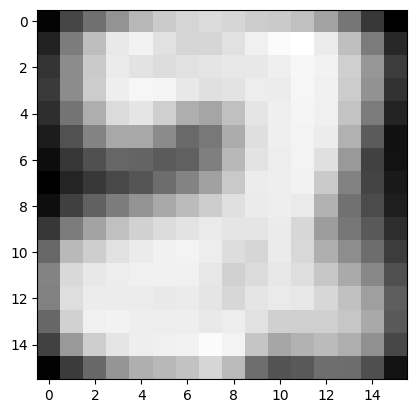

In [90]:
image_row = 2
image_arr2 = summary.iloc[image_row, 1:]
image_arr2 = image_arr2.values.reshape((16, 16))
plt.gray()
plt.imshow(image_arr2)

Training Errors

Linear Regression

In [91]:
y = ziptrain27["Y"]
x = ziptrain27.drop(columns=["Y"])
mod1 = LinearRegression().fit(x,y)
pred1 = mod1.predict(x)
y1pred = 2 + 5 * (pred1 >= 4.5)
train_err = np.mean(y1pred != y)
print("Training Error for Linear Regression = %0.05f"%(train_err))

Training Error for Linear Regression = 0.00073


KNN

In [92]:
kk = list(range(1,16,2))
ypred2 = []
knn_mod = []
for k in kk:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x,y)
    kpred = knn.predict(x)
    t_err = np.mean(kpred != y)
    ypred2.append(t_err)
    knn_mod.append(knn)

knn_names = ["KNN%d"%(k) for k in kk]
ypred2 = pd.DataFrame(ypred2, index=knn_names, columns=["Training Error"])
ypred2

,Training Error
KNN1,0.000000
KNN3,0.010174
KNN5,0.012355
KNN7,0.014535
KNN9,0.015988
KNN11,0.015988
KNN13,0.017442
KNN15,0.017442


Testing Errors

Linear Regression

In [93]:
test_err_y = ziptest27["Y"]
test_err_x = ziptest27.drop(columns=["Y"])
test_pred1 = mod1.predict(test_err_x)
test_y1pred = 2 + 5 * (test_pred1 >= 4.5)
test_err = np.mean(test_y1pred != test_err_y)
print("Test Error for Linear Regression = %0.05f"%(test_err))

Test Error for Linear Regression = 0.01739


KNN

In [94]:
test_err_knn = []
for knn in knn_mod:
    tknn_pred = knn.predict(test_err_x)
    tknn_err = np.mean(tknn_pred != test_err_y)
    test_err_knn.append(tknn_err)

test_err_knn = pd.DataFrame(test_err_knn, index=knn_names, columns=["Test Error"])
test_err_knn

,Test Error
KNN1,0.017391
KNN3,0.014493
KNN5,0.014493
KNN7,0.017391
KNN9,0.017391
KNN11,0.017391
KNN13,0.020290
KNN15,0.020290
